### Imports

In [1]:
%load_ext autoreload
%autoreload 1
%aimport src.generation
%aimport src.visualization

from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import src.generation as gen
import src.visualization as vis

### Generating random 2d points

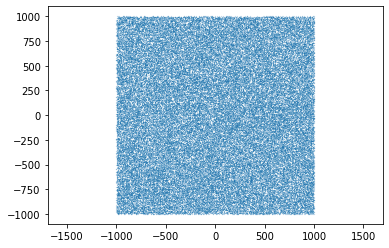

In [2]:
POINTS_A = gen.random_points_plane(10**5, np.array([-1000, -1000]), np.array([1000, 1000]))
vis.plot_points(POINTS_A, s=0.01)

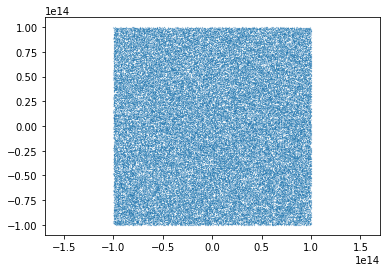

In [3]:
POINTS_B = gen.random_points_plane(10**5, np.array([-10**14, -10**14]), np.array([10**14, 10**14]))
vis.plot_points(POINTS_B, s=0.01)

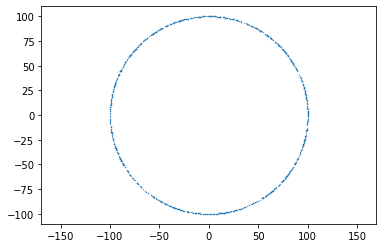

In [4]:
POINTS_C = gen.random_points_circle(1000, 100, np.array([0, 0]))
vis.plot_points(POINTS_C, s=0.1)

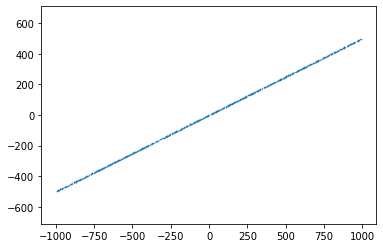

In [5]:
POINTS_D = gen.random_points_segment(1000, np.array([-1000, -500]), np.array([1000, 500]))
vis.plot_points(POINTS_D, s=0.1)

### Determining the position of the point relative to the segment

In [6]:
def orient1(a, b, c):
    m = np.ones((3,3))
    m[0, :2] = a
    m[1, :2] = b
    m[2, :2] = c
    return np.linalg.det(m)

def orient2(a, b, c):
    return np.linalg.det(np.vstack((a - c, b - c)))

def orient3(a, b, c):
    return a[0]*b[1] + b[0]*c[1] + c[0]*a[1] - a[0]*c[1] - b[0]*a[1] - c[0]*b[1]
    
def orient4(a, b ,c):
    x = a - c
    y = b - c
    return x[0]*y[1] - x[1]*y[0]

#### Examples

In [7]:
a = np.array([1.3,2.1])
b = np.array([3.6,4.4])
c = [
    np.array([4.5,6.1]),
    np.array([5.9,6.7]),
    np.array([3.5,3.8])
]

,c1,c2,c3
orient1,1.84,-1.838529e-15,-1.15
orient2,1.84,0.000000e+00,-1.15
orient3,1.84,-3.552714e-15,-1.15
orient4,1.84,0.000000e+00,-1.15


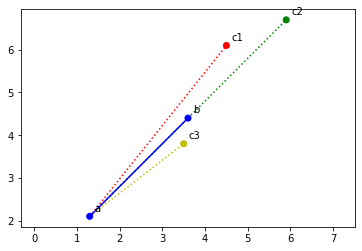

In [8]:
vis.plot_segments([[a,p] for p in c], colors=['r', 'g', 'y'], linestyles='dotted')
vis.plot_segments([[a,b]], colors='b')
vis.plot_points([a,b,*c], c=['b', 'b', 'r', 'g', 'y'], annotations=['a', 'b', 'c1', 'c2', 'c3'])

results = [[f(a,b,p) for p in c] for f in [orient1,orient2,orient3,orient4]]
pd.DataFrame(results, columns=['c1','c2','c3'], index=['orient1','orient2','orient3','orient4'])

### Testing `orient*` functions 

In [9]:
def split_points_by_orient(points, a, b, orient_func, atol=1e-08):
    rpp = np.apply_along_axis(lambda c: orient_func(a, b, c), 1, points)
    return (
        points[rpp > atol],
        points[np.isclose(rpp, 0.0, atol=atol)],
        points[rpp < -atol]
    )

def collect_test_data(points, a, b, functions, atols):
    data = []
    for func in functions:
        results = []
        for atol in atols:
            results += [len(g) for g in split_points_by_orient(points, a, b, func, atol)]
        data.append(results)
    
    columns = [f'{t} {a}' for a, t in product(atols, ['left','inline','right'])]
    index = [f.__name__ for f in functions]
    return pd.DataFrame(data, columns=columns, index=index)

In [10]:
ab = np.array([[-1.0, 0.0], [1.0, 0.1]])
functions = [orient1, orient2, orient3, orient4]
atols = [1e-13, 1e-12, 1e-11, 1e-10, 1e-09]

#### Points A

In [11]:
collect_test_data(POINTS_A, *ab, functions, atols)

,left 1e-13,inline 1e-13,right 1e-13,left 1e-12,inline 1e-12,right 1e-12,left 1e-11,inline 1e-11,right 1e-11,left 1e-10,inline 1e-10,right 1e-10,left 1e-09,inline 1e-09,right 1e-09
orient1,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185
orient2,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185
orient3,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185
orient4,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185,49815,0,50185


#### Points B

In [12]:
collect_test_data(POINTS_B, *ab, functions, atols)

,left 1e-13,inline 1e-13,right 1e-13,left 1e-12,inline 1e-12,right 1e-12,left 1e-11,inline 1e-11,right 1e-11,left 1e-10,inline 1e-10,right 1e-10,left 1e-09,inline 1e-09,right 1e-09
orient1,49751,0,50249,49751,0,50249,49751,0,50249,49751,0,50249,49751,0,50249
orient2,49745,10,50245,49745,10,50245,49745,10,50245,49745,10,50245,49745,10,50245
orient3,49751,0,50249,49751,0,50249,49751,0,50249,49751,0,50249,49751,0,50249
orient4,49747,9,50244,49747,9,50244,49747,9,50244,49747,9,50244,49747,9,50244


#### Points C

In [13]:
collect_test_data(POINTS_C, *ab, functions, atols)

,left 1e-13,inline 1e-13,right 1e-13,left 1e-12,inline 1e-12,right 1e-12,left 1e-11,inline 1e-11,right 1e-11,left 1e-10,inline 1e-10,right 1e-10,left 1e-09,inline 1e-09,right 1e-09
orient1,512,0,488,512,0,488,512,0,488,512,0,488,512,0,488
orient2,512,0,488,512,0,488,512,0,488,512,0,488,512,0,488
orient3,512,0,488,512,0,488,512,0,488,512,0,488,512,0,488
orient4,512,0,488,512,0,488,512,0,488,512,0,488,512,0,488


#### Points D

In [14]:
collect_test_data(POINTS_D, *ab, functions, atols)

,left 1e-13,inline 1e-13,right 1e-13,left 1e-12,inline 1e-12,right 1e-12,left 1e-11,inline 1e-11,right 1e-11,left 1e-10,inline 1e-10,right 1e-10,left 1e-09,inline 1e-09,right 1e-09
orient1,502,0,498,502,0,498,502,0,498,502,0,498,502,0,498
orient2,502,0,498,502,0,498,502,0,498,502,0,498,502,0,498
orient3,502,0,498,502,0,498,502,0,498,502,0,498,502,0,498
orient4,502,0,498,502,0,498,502,0,498,502,0,498,502,0,498


#### Visualisation

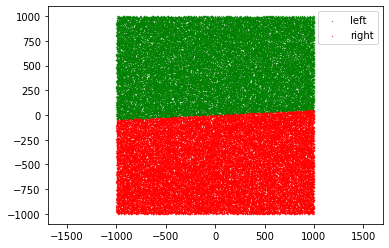

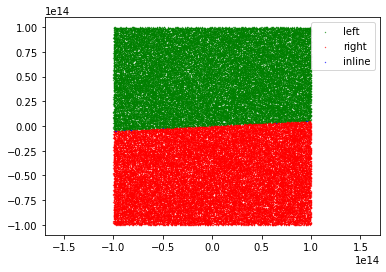

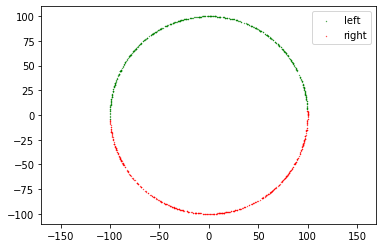

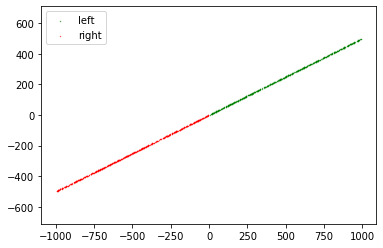

In [15]:
for points in [POINTS_A, POINTS_B, POINTS_C, POINTS_D]:
    left, inline, right = split_points_by_orient(points, *ab, orient2, atol=1e-10)
    vis.plot_points(left, c='g', s=0.1, label='left')
    vis.plot_points(right, c='r', s=0.1, label='right')
    vis.plot_points(inline, c='b', s=0.1, label='inline')
    plt.legend()
    plt.show()